In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Homework 4

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

**Due:** Feb. 13 at **12:30pm.**

## Exercise: First-Order Difference Equation - Temporary Shocks

For each of the first-order difference equations below, compute $y$ for $31$ periods (i.e., $t=0,\ldots, 30$) with $y_0=0$ and  $w$ equal to one in the second period ($t=1$) and zero otherwise (i.e., $w_1 = 1$ and $w_0=w_2=w_3 \cdots = w_{30} = 0$). Construct a well-labeled plot of $y$ for each simulation.

1. $y_{t} = 0.56 y_{t-1} + w_t$
2. $y_{t} = y_{t-1} + w_t$
3. $y_{t} = 0.24 y_{t-1} + w_t$
4. $y_{t} = -.9 y_{t-1} + w_t$
5. $y_{t} = 1.45 y_{t-1} + w_t$

You may use the function from the Notebook for Lecture 7, write your own, or take a more brute force approach.

### $\rho = 0.56$

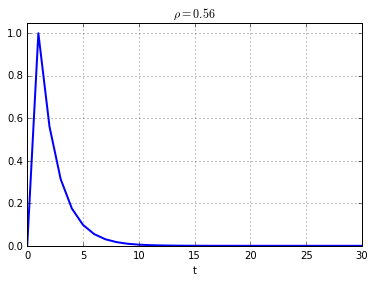

In [2]:
def TemporaryShock(rho: float, periods: int) -> plt.axis:
    
    df = pd.DataFrame({"w": np.zeros(periods + 1), "y": np.zeros(periods + 1)})  # set "y" placeholders
    df.w.at[1] = 1

    for i in range(1, len(df)):
        df.loc[i, "y"] = df.loc[i - 1, "y"] * rho + df.loc[i, "w"]

    df["t"] = df.index 

    ax = df.plot(x = "t", y = "y", lw = 2,
                title = rf"$\rho = {rho}$", legend = False, 
                xticks = np.arange(0, periods + 1, 5),  # make x-axis more readable
                ylim = (0, df.y.max() * 1.05))          # adjust upper ylim based on "y"

    return ax
    
TemporaryShock(.56, 30)
plt.grid()
plt.show()

### $\rho =1$

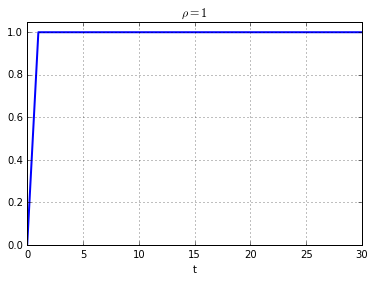

In [3]:
TemporaryShock(1, 30)
plt.grid()
plt.show()

### $\rho=0.24$

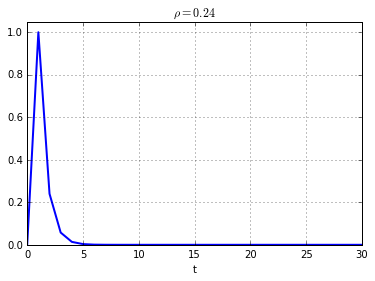

In [4]:
TemporaryShock(.24, 30)
plt.grid()
plt.show()

### $\rho = -0.9$

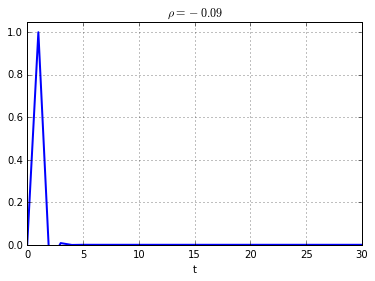

In [5]:
TemporaryShock(-.09, 30)
plt.grid()
plt.show()

### $\rho = 1.45$

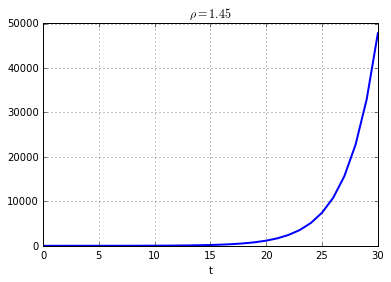

In [6]:
TemporaryShock(1.45, 30)
plt.grid()
plt.show()

**Questions**

For each value for $\rho$, identify whether the first-order difference equation is stable, explosive, or neither.

1. $\rho =  0.56$
2. $\rho = 1$
3. $\rho =  0.24$
4. $\rho =  -.9$
5. $\rho =  1.45$

**Answers**

1. Stable

2. Neither

3. Stable 

4. Stable 

5. Explosive

## Exercise: First-Order Difference Equation - Permanent Shocks

For each of the first-order difference equations below, compute $y$ for $31$ periods (i.e., $t=0,\ldots, 30$) with $y_0 = 0$ and $w$ equal to zero in the first period ($t=0$) and one otherwise (i.e., $w_1 = 0$ and $w_1=w_2=w_3 \cdots = w_{30} = 1$). Note that you can use the NumPy function `ones()` to create an array of ones analagously to how you use `zeros()` to create an array of zeros.

Construct a well-labeled plot of $y$ for each simulation.

1. $y_{t} = 0.37 y_{t-1} + w_t$
2. $y_{t} = y_{t-1} + w_t$
3. $y_{t} = -0.8 y_{t-1} + w_t$

You may use the function from the Notebook for Lecture 7, write your own, or take a more brute force approach.

### $\rho = 0.37$

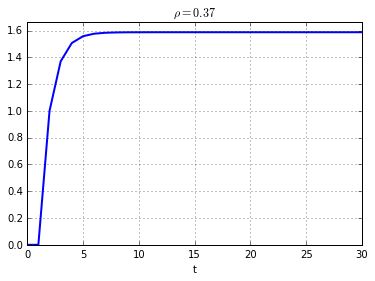

In [7]:
def PermanentShock(rho: float, periods: int) -> plt.axis:
    
    df = pd.DataFrame({"w": np.ones(periods + 1), "y": np.zeros(periods + 1)})  # set "y" placeholders
    df.w.at[1] = 0

    for i in range(1, len(df)):
        df.loc[i, "y"] = df.loc[i - 1, "y"] * rho + df.loc[i, "w"]

    df["t"] = df.index 

    ax = df.plot(x = "t", y = "y", lw = 2,
                title = rf"$\rho = {rho}$", legend = False, 
                xticks = np.arange(0, periods + 1, 5),  # make x-axis more readable
                ylim = (0, df.y.max() * 1.05))          # adjust upper ylim based on "y"

    return ax


PermanentShock(.37, 30)
plt.grid()
plt.show()

### $\rho = 1$

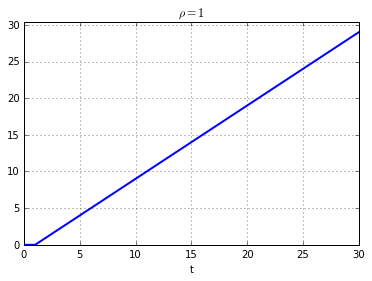

In [8]:
PermanentShock(1, 30)
plt.grid()
plt.show()

### $\rho = -0.8$

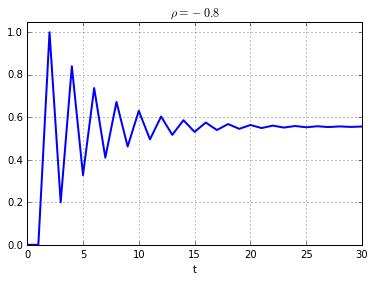

In [9]:
PermanentShock(-.8, 30)
plt.grid()
plt.show()

## Exercise: Hall's Model of Unemployment

In the 1979 article "A theory of the natural unemployment rate and the duration of employment" Robert Hall proposed a dynamic model of unemployment that is the foundation of contemporary models of unemployment (link to article: [https://www.sciencedirect.com/science/article/abs/pii/0304393279900011](https://www.sciencedirect.com/science/article/abs/pii/0304393279900011)).

Let $U_t$ denote the number of people unemployed in month $t$ and let $E_t$ denote the number of employed workers. Assume that the labor force is fixed at size $L$. By definition, the labor force equals the sum of the number of employed and unemployed workers:

\begin{align}
L & = E_t + U_t.
\end{align}

Each month, a randomly-determined fraction $f$ of unemployed workers find jobs and a fraction $s$ of employed workers lose, or become separated from, their jobs. We call $f$ the *job-finding rate* and $s$ the *separation rate*. The implied law of motion for the number of unemployed people is:

\begin{align}
U_{t+1} & = (1-f)U_t + sE_t.
\end{align}

Use the definition of the labor force to elimiate $E_t$ from the law of motion for unemployment:

\begin{align}
U_{t+1} & = (1-f)U_t + s(L - U_t),
\end{align}

and then divide by $L$ to express the law of motion in terms of the unemployment rate $u_t$:

\begin{align}
u_{t+1} & = (1-f)u_t + s(1-u_t),
\end{align}

where $u_t \equiv U_t/L$.

In this exercise, you will:

1. Calibrate $f$ so that the model predicts average unemployment duration equal to the US average.
2. Calibrate $s$ so that the steady state unemployment rate in the model equals the average unemployment rate of the US.
3. Compute a dynamic simulation of the model.

Follow the instructions in the following cells.

### Part (a): Mean Unemployment Duration

A constant job-finding rate $f$ implies that the average number of months that an unemployed worker is inversely proportional to $f$:

\begin{align}
\text{Average duration} & = \frac{1}{f}
\end{align}

See page 27 of my paper with Paul Jackson and Argya Bhattacharya for an explanation of why this makes sense: https://www.tandfonline.com/doi/full/10.1080/00220485.2017.1397574. But, for example, if the job-finding rate were 0.4, then a worker who become unemployed will wait 2.5 months on average before finding a new job.

For this part, use mean unemployment duration data from FRED (https://fred.stlouisfed.org/series/UEMPMEAN/) to compute the average job-finding rate for the US.

In [10]:
# Download mean unemployment duration data from FRED. PROVIDED
duration = pd.read_csv('https://fred.stlouisfed.org/data/UEMPMEAN.txt',skiprows=13,sep='\s+',index_col=0,parse_dates=True)

# Set duration equal to itself divided by 4 to convert weekly data into monthly data
duration = duration/4

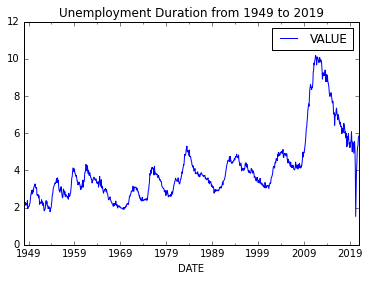

In [11]:
# Construct a well-labeled plot of mean unemployment duration

duration.plot(title = "Unemployment Duration from 1949 to 2019")
plt.show()

In [12]:
# Create a variable called 'f' equal to one divided by the mean of mean unemployment duration

f = float(1/duration.mean())

# Print the value of f
f 

0.2480901167524551

**Questions**

1. On average, how many months has the average unemployed worker in the US remained unemployed?
2. What was the highest unemployment duration and in which month and year did this occur?

**Answers**

1. 6 months

2. Highest unexmployment was 10.175% in July of 2011

### Part (b): Average Unemployment Rate

In the steady state, $u_t = u_{t+1} = u^*$:

\begin{align}
u^* & = \frac{1}{1+f/s}
\end{align}

Unlike the job-finding rate $f$, it is harder to find data that would directly pin down a value for the separation rate $s$. So we will **calibrate** $s$ by selecting a value implies that the steady state unemployment rate equals the average unemployment rate for the US.

For this part, use unemployment rate data from FRED (https://fred.stlouisfed.org/series/UNRATE/) to compute the average unemployment rate for the US and then the implied value for $s$.

In [13]:
# Download unemployment rate data from FRED. PROVIDED
unemployment = pd.read_csv('https://fred.stlouisfed.org/data/UNRATE.txt',skiprows=23,sep='\s+',index_col=0)

# Set unemployment equal to itself divided by 100
unemployment = unemployment/100
# Create a variable called 'u_star' that is equal to the mean unemployment rate for the US
u_star = float(unemployment.mean())

# Print u_star
u_star

0.05766666666666667

In [14]:
# Create a variable called 's' equal to the separation rate implied by the computed values f and u_star
s = float((u_star + f)/(1 - u_star))

# Print s
s 

0.3244677574309746

### Part (c): Simulation of Hall's Model

Use Hall's model to simulate the unemployment rate for 26 periods (i.e., $t=0, \ldots, 25$) for $u_0= 0.01$ and $u_0 = 0.05$. Plot both simulations on the same set of axes and be sure to add a legend so that I can see which line corresponds to which value of $u_0$.

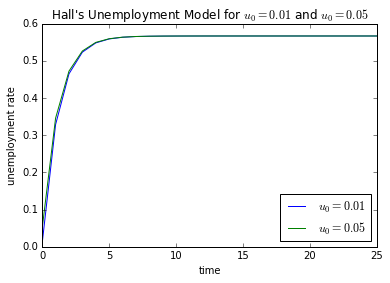

In [15]:

df = pd.DataFrame({"temp1": np.zeros(26), "temp2": np.zeros(26)})
df.temp1.at[0] = 0.01 
df.temp2.at[0] = 0.05

for i in range(1, len(df)):
    df.loc[i, "temp1"] = df.loc[i - 1, "temp1"] * (1 - f) + (1 - df.loc[i - 1, "temp1"]) * s 
    df.loc[i, "temp2"] = df.loc[i - 1, "temp2"] * (1 - f) + (1 - df.loc[i - 1, "temp2"]) * s

plt.plot(df.temp1, label = r"$u_0 = 0.01$")
plt.plot(df.temp2, label = r"$u_0 = 0.05$")
plt.xlabel("time")
plt.ylabel("unemployment rate")
plt.title(r"Hall's Unemployment Model for $u_0 = 0.01$ and $u_0 = 0.05$")
plt.legend(loc = "lower right") 
plt.show()

## Exercise: Solow Model with Exogenous Labor and Technology

Consider the Solow growth model with exogenous labor and TFP growth. That is, let $L_t$ denote the quantity of labor and suppose that the population (and therefore the labor supply) grows at the constant rate $n$. This means:

\begin{align}
L_{t+1} & = (1+n)L_t,
\end{align}

where the intial value of labor $L_0$ must be given. And let $A_t$ denote exogenous TFP that grows at rate $g$:

\begin{align}
A_{t+1} & = (1+g)A_t,
\end{align}

with $A_0$ given. The rest of the model in aggregate terms is:

\begin{align}
Y_t & = A_tK_t^{\alpha}L_t^{1-\alpha}\\
K_{t+1} & = I_t + (1-\delta)K_{t}\\
Y_t & = C_t + I_t\\
C_t & = (1-s)Y_t,
\end{align}

where the intial value of capital $K_0$ is also given.

Since capital *and* labor *and* TFP are all determined in the previous period by their respective laws of motion, the Solow model with exogenous labor and TFP growth has *three* state variables: $K_t$, $L_t$, and $A_t$. We can solve the capital law of motion for capital in terms of only the variables capital, labor , and TFP and so the three equations that determine how the state of the economy evolves are:

\begin{align}
K_{t+1} & = sA_tK_t^{\alpha}L_t^{1-\alpha} + (1-\delta)K_{t}\\
L_{t+1} & = (1+n)L_t\\
A_{t+1} & = (1+g)A_t
\end{align}

If we iterate on these two to compute simulations of $K_t$ and $L_t$, then we can compute $Y_t$, $C_t$, and $I_t$ easily.

Let's suppose the following values for a simulation:

| $L_0$ | $n$  | $A_0$ | $g$  | $K_0$ | $s$  | $\alpha$ | $\delta $ | $T$ |
|-------|------|-------|------|-------|------|----------|-----------|-----|
| 1     | 0.01 | 1     | 0.02 | 10    | 0.1  | 0.35     | 0.1       | 101 |

Do the following:
1. Compute simulated values for $K_t$ and $L_t$ and $A_t$.
2. Use simulated values of $K_t$ and $L_t$ and $A_t$ to compute and plot simulated series for output $Y_t$ and output *per worker* $Y_t/L_t$ side-by-side in the same figure.

You may use the function from the Notebook for Lecture 8, write your own, or take a more brute force approach. 

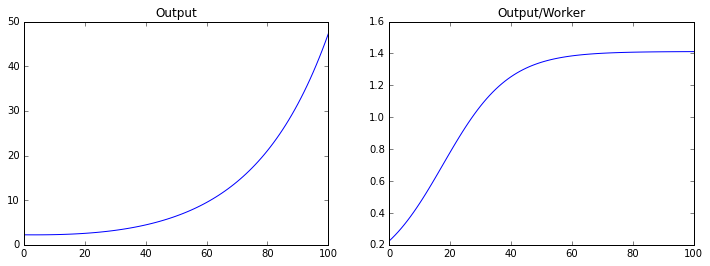

In [16]:
# Create variables 'K0', 'L0', 'A0', 'n', 'g', 's', 'alpha','delta','T' to store parameter values for the simulation

K0 = 10 
L0 = 1
A0 = 1 
n = .01 
g = .02
s = .1
alpha = .35
delta = .1 
T = 101

# Simulate the model

K = np.zeros(101)
L = np.zeros(101)
A = np.zeros(101)

K[0] = K0 
L[0] = L0 
A[0] = A0 


for i in range(1, T):

    K_prev = K[i - 1]
    L_prev = L[i - 1]
    A_prev = A[i - 1]

    K[i] = (A_prev * s) * (K_prev ** alpha) * (L_prev ** (1 - alpha)) +  K_prev * (1 - delta)
    L[i] = L_prev * (1 + n)
    A[i] = A_prev * (1 + g)

Y = A * (K**alpha) * (L**(1-alpha))
Y_L = Y/K 

# Create a figure that is wide enough for two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

# Construct a plot of simulated output
ax1.plot(Y)
ax1.set_title("Output")


# Construct a plot of simulated output per worker
ax2.plot(Y_L)
ax2.set_title("Output/Worker")

plt.show()